# RAIN PREDICTION IN AUSTRALIA

## IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## IMPORTING THE DATASET

In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv')

## EXPLORATORY DATA ANALYSIS (EDA)

In [3]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


In [4]:
df.tail()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
3266,6/21/2017,8.6,19.6,0.0,2.0,7.8,SSE,37,W,SSE,...,73,52,1025.9,1025.3,2,2,10.5,17.9,No,No
3267,6/22/2017,9.3,19.2,0.0,2.0,9.2,W,30,W,ESE,...,78,53,1028.5,1024.6,2,2,11.0,18.7,No,No
3268,6/23/2017,9.4,17.7,0.0,2.4,2.7,W,24,WNW,N,...,85,56,1020.8,1015.0,6,6,10.2,17.3,No,No
3269,6/24/2017,10.1,19.3,0.0,1.4,9.3,W,43,W,W,...,56,35,1017.3,1015.1,5,2,12.4,19.0,No,No
3270,6/25/2017,7.6,19.3,0.0,3.4,9.4,W,35,W,W,...,73,32,1018.6,1015.4,1,1,9.4,18.8,No,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3271 non-null   object 
 1   MinTemp        3271 non-null   float64
 2   MaxTemp        3271 non-null   float64
 3   Rainfall       3271 non-null   float64
 4   Evaporation    3271 non-null   float64
 5   Sunshine       3271 non-null   float64
 6   WindGustDir    3271 non-null   object 
 7   WindGustSpeed  3271 non-null   int64  
 8   WindDir9am     3271 non-null   object 
 9   WindDir3pm     3271 non-null   object 
 10  WindSpeed9am   3271 non-null   int64  
 11  WindSpeed3pm   3271 non-null   int64  
 12  Humidity9am    3271 non-null   int64  
 13  Humidity3pm    3271 non-null   int64  
 14  Pressure9am    3271 non-null   float64
 15  Pressure3pm    3271 non-null   float64
 16  Cloud9am       3271 non-null   int64  
 17  Cloud3pm       3271 non-null   int64  
 18  Temp9am 

In [6]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000
mean,14.877102,23.005564,3.342158,5.175787,7.168970,41.476307,15.077041,19.294405,68.243962,54.698563,1018.334424,1016.003085,4.318557,4.176093,17.821461,21.543656
std,4.554710,4.483752,9.917746,2.757684,3.815966,10.806951,7.043825,7.453331,15.086127,16.279241,7.020090,7.019915,2.526923,2.411274,4.894316,4.297053
min,4.300000,11.700000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.250000,35.000000,11.000000,15.000000,58.000000,44.000000,1013.700000,1011.300000,2.000000,2.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,41.000000,15.000000,19.000000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,18.800000,26.000000,1.400000,7.000000,10.200000,44.000000,20.000000,24.000000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,96.000000,54.000000,57.000000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


In [7]:
df.nunique()

Date             3271
MinTemp           204
MaxTemp           247
Rainfall          208
Evaporation        82
Sunshine          137
WindGustDir        16
WindGustSpeed      44
WindDir9am         16
WindDir3pm         16
WindSpeed9am       26
WindSpeed3pm       29
Humidity9am        80
Humidity3pm        86
Pressure9am       361
Pressure3pm       369
Cloud9am           10
Cloud3pm            9
Temp9am           229
Temp3pm           240
RainToday           2
RainTomorrow        2
dtype: int64

In [8]:
df.shape

(3271, 22)

## VISUALIZING THE DATA

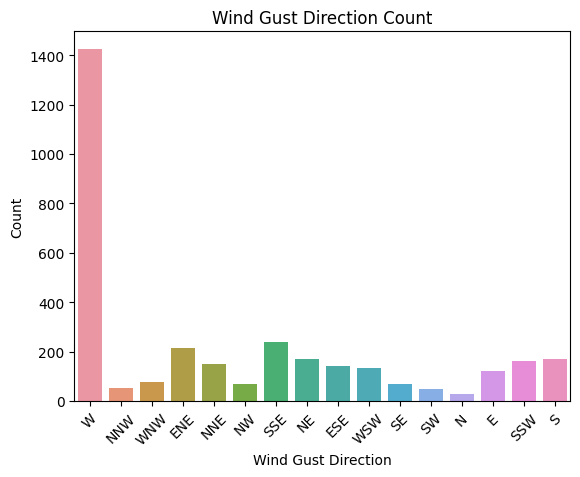

In [9]:
sns.countplot(data=df, x='WindGustDir')
plt.title("Wind Gust Direction Count")
plt.xlabel("Wind Gust Direction")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

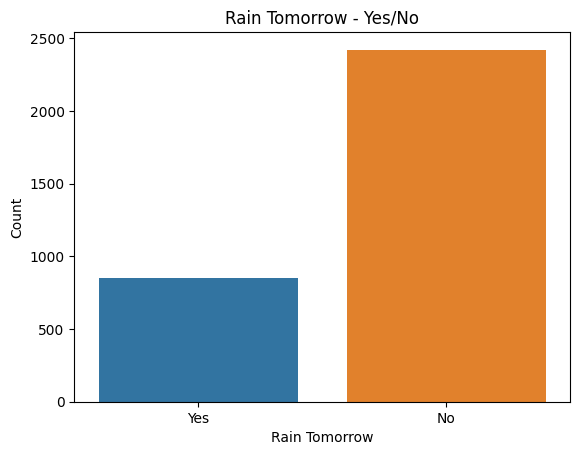

In [10]:
sns.countplot(data=df, x='RainTomorrow')
plt.title('Rain Tomorrow - Yes/No')
plt.xlabel('Rain Tomorrow')
plt.ylabel('Count')
plt.show()

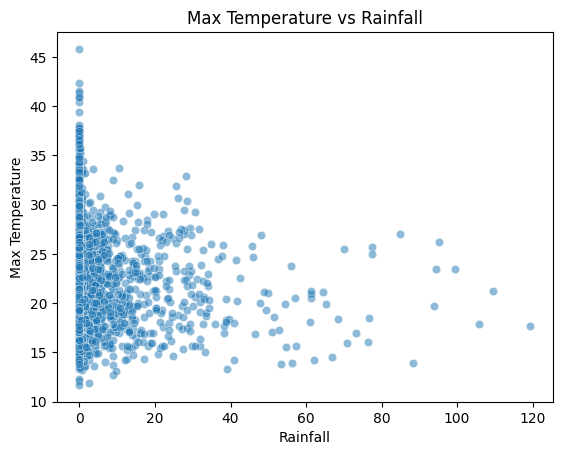

In [11]:
sns.scatterplot(data=df, x='Rainfall', y='MaxTemp', alpha=0.5)
plt.title('Max Temperature vs Rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Max Temperature')
plt.show()

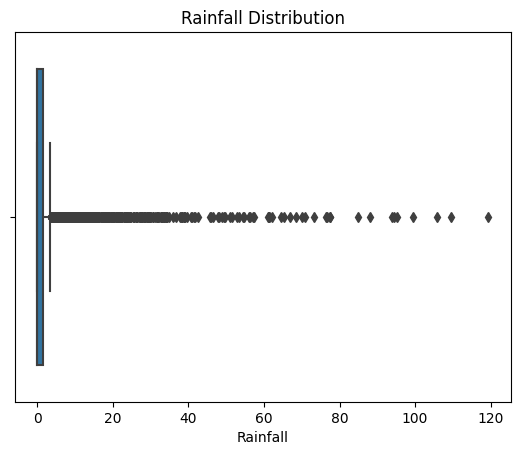

In [12]:
sns.boxplot(x=df['Rainfall'])
plt.title("Rainfall Distribution")
plt.xlabel("Rainfall")
plt.show()

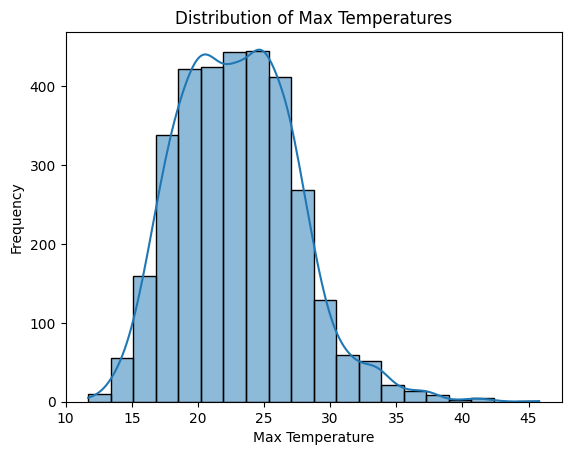

In [13]:
sns.histplot(df['MaxTemp'], bins=20, kde=True)
plt.title('Distribution of Max Temperatures')
plt.xlabel('Max Temperature')
plt.ylabel('Frequency')
plt.show()

/home/u195283/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


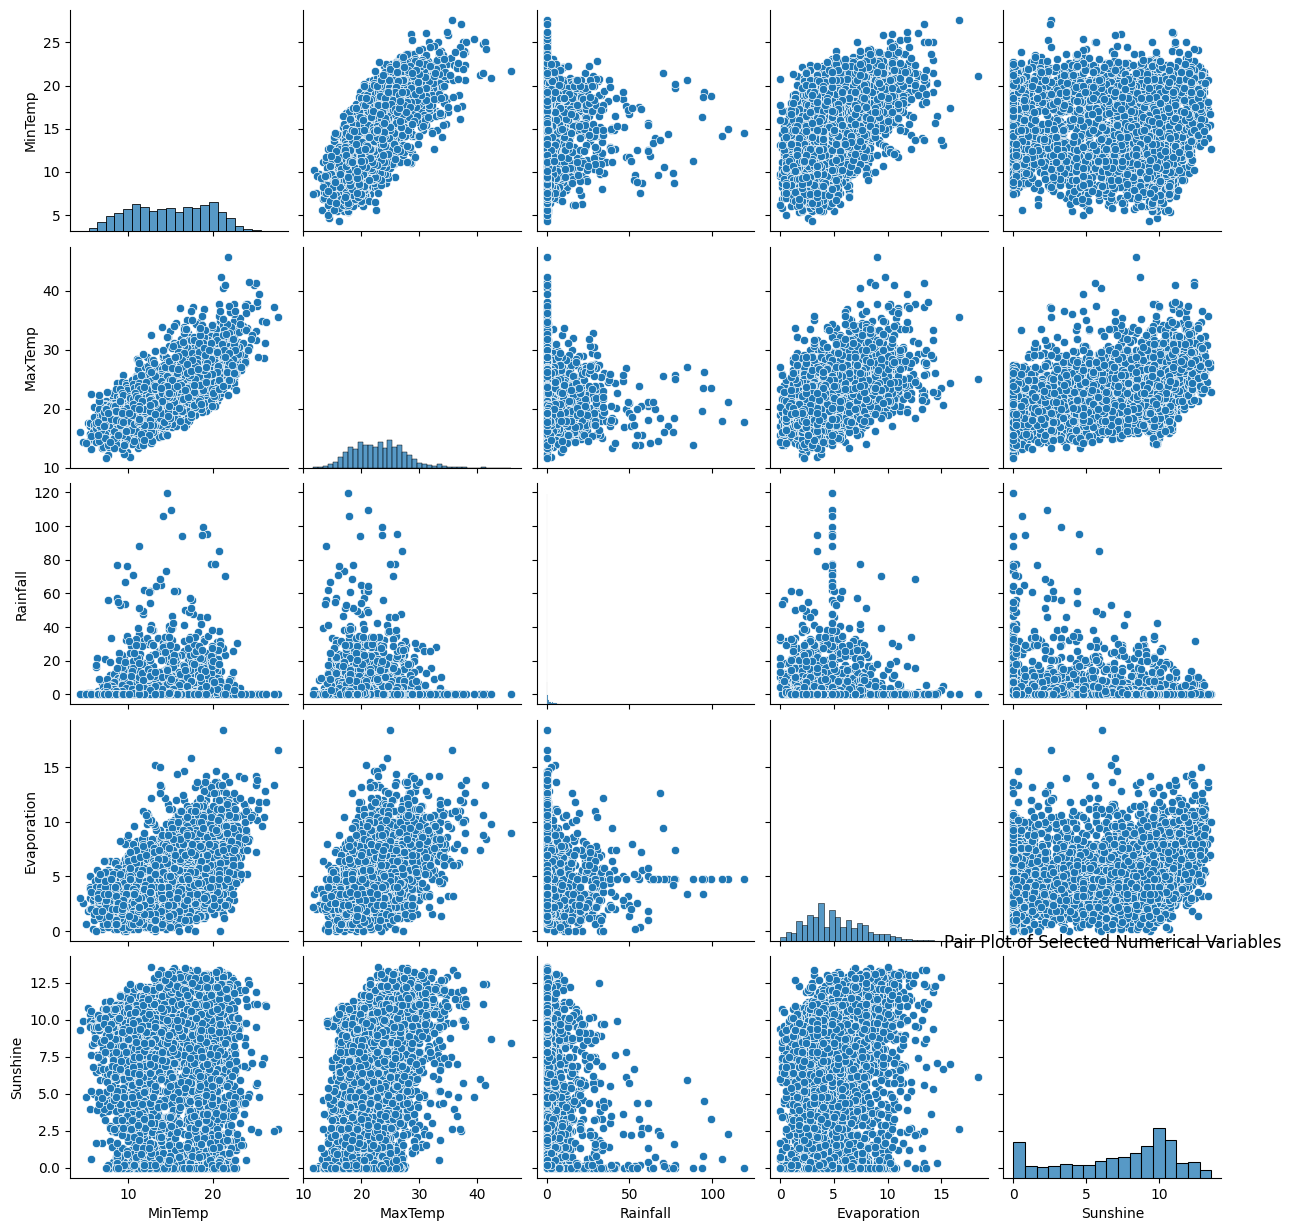

In [14]:
attributes = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine']

# Create a pair plot for the selected attributes
sns.pairplot(df[attributes])
plt.title("Pair Plot of Selected Numerical Variables")
plt.show()

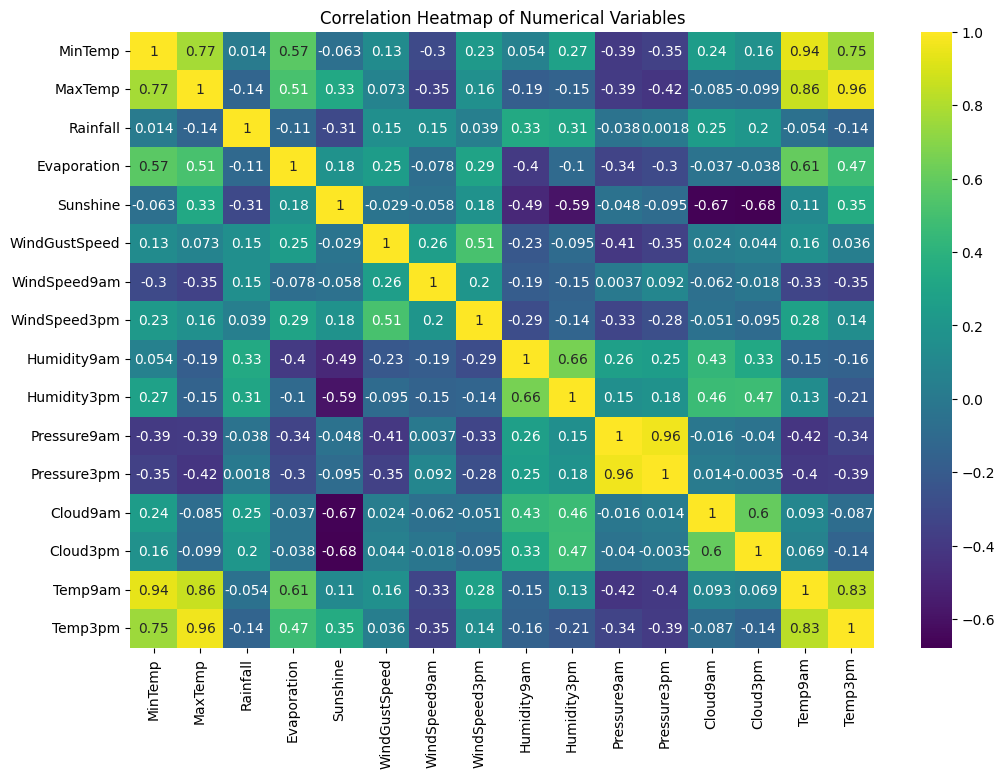

In [15]:
columns = df.select_dtypes(include=[float, int]).columns
corr_matrix = df[columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

## DATA PREPROCESSING

In [16]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [17]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

In [18]:
df_sydney_processed.drop('Date',axis=1,inplace=True)

In [19]:
df_sydney_processed = df_sydney_processed.astype(float)

In [20]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

## SPLITING THE DATASET FOR TRAINING AND TESTING

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=10)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

## LINEAR REGRESSSION

In [23]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()

In [24]:
linear_reg.fit(X_train_scaled, y_train)
predictions = linear_reg.predict(X_test_scaled)

In [25]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

LinearRegression_MAE = mean_absolute_error(y_test, predictions)
LinearRegression_MSE = mean_squared_error(y_test, predictions)
LinearRegression_R2 = r2_score(y_test, predictions)

In [26]:
data = {'Metric': ['MAE', 'MSE', 'R2'],
        'Linear Regression': [LinearRegression_MAE, LinearRegression_MSE, LinearRegression_R2]}

Report = pd.DataFrame(data)
print(Report)

  Metric  Linear Regression
0    MAE           0.256318
1    MSE           0.115721
2     R2           0.427132


## KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

In [28]:
KNN.fit(X_train_scaled, y_train)
predictions = KNN.predict(X_test_scaled)

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

KNN_Accuracy_Score = accuracy_score(y_test, predictions)
KNN_JaccardIndex = jaccard_score(y_test, predictions)
KNN_F1_Score = f1_score(y_test, predictions)

print("KNN Accuracy Score:", KNN_Accuracy_Score)
print("KNN Jaccard Index:", KNN_JaccardIndex)
print("KNN F1 Score:", KNN_F1_Score)

KNN Accuracy Score: 0.7984732824427481
KNN Jaccard Index: 0.38028169014084506
KNN F1 Score: 0.5510204081632653


## DECISION TREE

In [30]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [31]:
tree.fit(X_train_scaled, y_train)
predictions = tree.predict(X_test_scaled)

In [32]:
Tree_Accuracy_Score = accuracy_score(y_test, predictions)
Tree_JaccardIndex = jaccard_score(y_test, predictions)
Tree_F1_Score = f1_score(y_test, predictions)

print("Tree Accuracy Score:", Tree_Accuracy_Score)
print("Tree Jaccard Index:", Tree_JaccardIndex)
print("Tree F1 Score:", Tree_F1_Score)

Tree Accuracy Score: 0.7633587786259542
Tree Jaccard Index: 0.4128787878787879
Tree F1 Score: 0.5844504021447721


## LOGISTIC REGRESSION

In [33]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=1)

In [34]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='liblinear')

In [35]:
LR.fit(X_train_scaled, y_train)
predictions = LR.predict(X_test_scaled)

In [36]:
from sklearn.metrics import log_loss

LR_Accuracy_Score = accuracy_score(y_test, predictions)
LR_JaccardIndex = jaccard_score(y_test, predictions)
LR_F1_Score = f1_score(y_test, predictions)
LR_Log_Loss = log_loss(y_test, LR.predict_proba(x_test))

print("LR Accuracy Score:", LR_Accuracy_Score)
print("LR Jaccard Index:", LR_JaccardIndex)
print("LR F1 Score:", LR_F1_Score)
print("LR Log Loss:", LR_Log_Loss)

LR Accuracy Score: 0.7221374045801526
LR Jaccard Index: 0.0
LR F1 Score: 0.0
LR Log Loss: 6.232206181149141


/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


## SUPPORT VECTOR MACHINE

In [37]:
from sklearn import svm
SVM = svm.SVC(kernel='linear')

In [38]:
SVM.fit(X_train_scaled, y_train)
predictions = SVM.predict(X_test_scaled)

In [39]:
SVM_Accuracy_Score = accuracy_score(y_test, predictions)
SVM_JaccardIndex = jaccard_score(y_test, predictions)
SVM_F1_Score = f1_score(y_test, predictions)

print("SVM Accuracy Score:", SVM_Accuracy_Score)
print("SVM Jaccard Index:", SVM_JaccardIndex)
print("SVM F1 Score:", SVM_F1_Score)

SVM Accuracy Score: 0.7221374045801526
SVM Jaccard Index: 0.0
SVM F1 Score: 0.0


## CREATING DATAFRAME FOR METRICES

In [40]:
data = {'Model': ['Linear Regression', 'KNN', 'Decision Tree', 'Logistic Regression', 'SVM'],
        'Accuracy': [LinearRegression_MAE, KNN_Accuracy_Score, Tree_Accuracy_Score , LR_Accuracy_Score, SVM_Accuracy_Score],
        'Jaccard Index': [None, KNN_JaccardIndex, Tree_JaccardIndex, LR_JaccardIndex, SVM_JaccardIndex],
        'F1-Score': [None, KNN_F1_Score, Tree_F1_Score, LR_F1_Score, SVM_F1_Score],
        'Log Loss (LR)': [None, None, None, LR_Log_Loss, None]}

Report = pd.DataFrame(data)
print(Report)

                 Model  Accuracy  Jaccard Index  F1-Score  Log Loss (LR)
0    Linear Regression  0.256318            NaN       NaN            NaN
1                  KNN  0.798473       0.380282   0.55102            NaN
2        Decision Tree  0.763359       0.412879   0.58445            NaN
3  Logistic Regression  0.722137       0.000000   0.00000       6.232206
4                  SVM  0.722137       0.000000   0.00000            NaN


## VISUALIZING THE METRICES

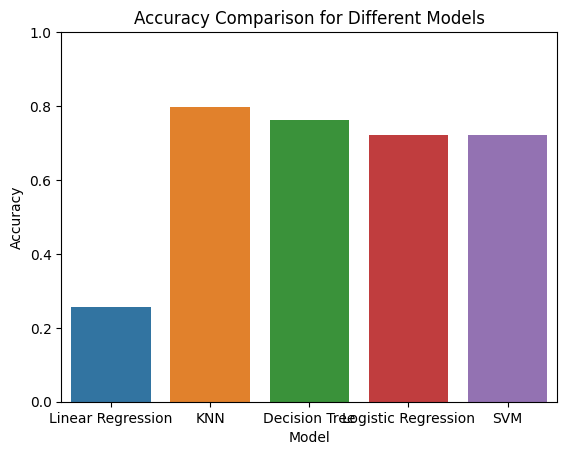

In [41]:
sns.barplot(x='Model', y='Accuracy', data=Report)
plt.title('Accuracy Comparison for Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0) 
plt.show()

## PREDICTION

In [42]:
y_pred = KNN.predict(X_test_scaled)
if y_pred[0] == 0:
    prediction = "No Rain"
else:
    prediction = "Rain"

print("Predicted Weather:", prediction)

Predicted Weather: No Rain
